# Regularization 正则化
深度学习模型有很好的灵活性以及性能以致于过拟合成为了一个严重的问题，如果训练集不够大的话。无疑在训练集上效果很好但是这个学习后的网络没有从这些样本来很好的推测出新的样本，即测试集。
使用正则化在你的深度学习模型中。

In [4]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from reg_utils import sigmoid, relu, plot_decision_boundary, initialize_parameters, load_2D_dataset, predict_dec
from reg_utils import compute_cost, predict, forward_propagation, backward_propagation, update_parameters
import sklearn
import sklearn.datasets
import scipy.io
from testCases import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

问题陈述：你刚被法国足球协会雇佣为一个AI专家，他们希望你推荐法国守门员应该踢的位置，这样法国队的队员就可以用他们的头击球。
![足球场地](https://upload-images.jianshu.io/upload_images/5355764-4059fdbc9b182a13.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
守门员把球击到空中，每个队的运动争夺着用头击球。
他们给了你法国过去10场比赛的平面数据。

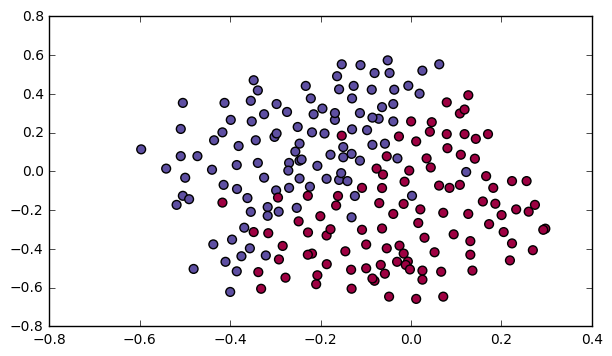

In [5]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()

上图中每个点对应足球场上一个足球运动员用头击中求的位置，在守门员从足球场地最左侧发球之后。如果点是蓝色的，代表是法国运动员击中了球，如果是红色说明其他队的运动员击中了的球。
你的目标就是使用一个深度学习模型来找到相关场地的位置，使守门员能踢球给正确的队友。
数据集分析：
    数据集有一些噪音，但是看起来像对角线分来的上左部分即蓝色区和下右部分的红色区。
首先尝试一个没有正则化的模型，然后你会学到如何正则化这个模型并且决定哪个模型可以用来解决问题。

## 1，Non-regulariozation model 无正则化模型
首先使用下面已经实现好的神经网络，这个模型可以在正则化模型中用到以及dropout模型中用到：
1. in regularization mode  设置lambd为一个非零值
2. dropout mode 设置keep_prob为一个小于1的值

首先你要尝试不使用任何正则化的模型，就会实现：
1. L2 regularization 会用到相关函数"compute_cost_with_regularization()" 和 "backward_propagation_with_regularization()"
2. Dropout  使用到函数 "forward_propagation_with_dropout()" 和 "backward_propagation_with_dropout()"

In [6]:
def model(X, Y, learning_rate = 0.3, num_iterations = 30000, print_cost = True, lambd = 0, keep_prob = 1):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (output size, number of examples)
    learning_rate -- learning rate of the optimization
    num_iterations -- number of iterations of the optimization loop
    print_cost -- If True, print the cost every 10000 iterations
    lambd -- regularization hyperparameter, scalar
    keep_prob - probability of keeping a neuron active during drop-out, scalar.
    
    Returns:
    parameters -- parameters learned by the model. They can then be used to predict.
    """
        
    grads = {}
    costs = []                            # to keep track of the cost
    m = X.shape[1]                        # number of examples
    layers_dims = [X.shape[0], 20, 3, 1]
    
    # Initialize parameters dictionary.
    parameters = initialize_parameters(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        if keep_prob == 1:
            a3, cache = forward_propagation(X, parameters)  #keep_prob=1，则不会使隐藏单元随机消失，所以就普通计算代价公式
        elif keep_prob < 1:
            a3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)
        
        # Cost function
        if lambd == 0:
            cost = compute_cost(a3, Y)   #lambd=0，说明没有使用L2正则化
        else:
            cost = compute_cost_with_regularization(a3, Y, parameters, lambd)
            
        # Backward propagation.
        assert(lambd==0 or keep_prob==1)    # it is possible to use both L2 regularization and dropout, 
                                            # but this assignment will only explore one at a time
        if lambd == 0 and keep_prob == 1:
            grads = backward_propagation(X, Y, cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 10000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.655741252348
Cost after iteration 1000: 0.222266938685
Cost after iteration 2000: 0.202887026076
Cost after iteration 3000: 0.182514979247
Cost after iteration 4000: 0.180539783062
Cost after iteration 5000: 0.176204717584
Cost after iteration 6000: 0.168327303921
Cost after iteration 7000: 0.165835936547
Cost after iteration 8000: 0.163126719145
Cost after iteration 9000: 0.159426122532
Cost after iteration 10000: 0.163299875257
Cost after iteration 11000: 0.160986144878
Cost after iteration 12000: 0.157644741482
Cost after iteration 13000: 0.152135996442
Cost after iteration 14000: 0.14843713519
Cost after iteration 15000: 0.147964009226
Cost after iteration 16000: 0.146348763063
Cost after iteration 17000: 0.146343758631
Cost after iteration 18000: 0.143350885374
Cost after iteration 19000: 0.139364883623
Cost after iteration 20000: 0.138516424232
Cost after iteration 21000: 0.141186783518
Cost after iteration 22000: 0.136293194688
Cost after iteration 2300

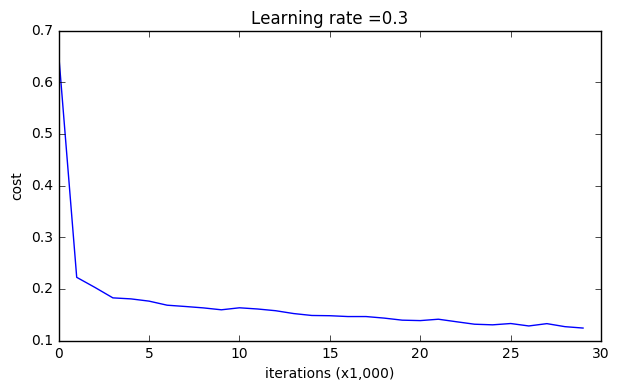

On the training set:
Accuracy: 0.947867298578
On the test set:
Accuracy: 0.915


In [7]:
# 训练模型不使用任何正则化，观察训练集和测试集的正确率
#model函数后面参数默认值是不使用正则化
parameters = model(train_X, train_Y)
print ("On the training set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

这个训练集上正确率大约94.8%，然而测试集正确率为91.5%，这是因为这是基线模型，接下来你将观察正则化对该模型的影响。使用下面代码来画出决策边界。

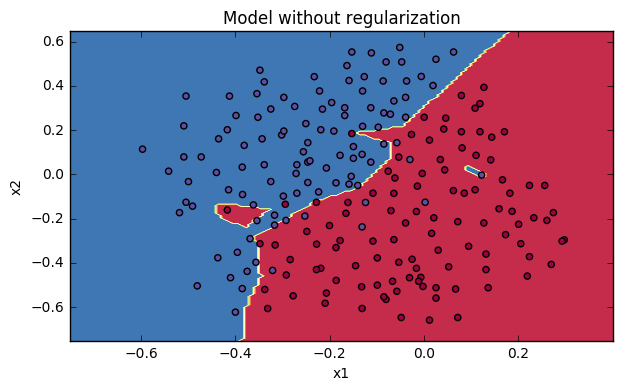

In [8]:
plt.title("Model without regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

没有正则化的模型很明显过拟合了训练集，它把噪音数据也拟合进去了。接下来看两种可以减少过拟合的技术。

## 2 L2正则化
标准的用来避免过拟合的方法是L2正则化，它包括了适当修改你的成本函数。从原本的公式（1）修改为公示了（2），在后面添加了正则项。
$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small  y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} \tag{1}$$
To:
$$J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} \tag{2}$$

接下里修改的你函数，并且观察结果。
练习：实现compute_cost_with_regularization() ，按公式（2）的方法计算L2正则化用到的代价函数公式。$\sum\limits_k\sum\limits_j W_{k,j}^{[l]2}$ 这个公式表示了一个W参数矩阵里的所有元素的平方和。可以直接使用np.sum(np.square(Wl))这个函数计算得到结果。最后把每一层的W参数的内容都加起来即可，本实例中的模型是一个单层模型，所以关于W的参数有W1，W2，W3,并且前面乘以系数 $ \frac{1}{m} \frac{\lambda}{2} $。

In [9]:
# GRADED FUNCTION: compute_cost_with_regularization

def compute_cost_with_regularization(A3, Y, parameters, lambd):
    """
    Implement the cost function with L2 regularization. See formula (2) above.
    
    Arguments:
    A3 -- post-activation, output of forward propagation, of shape (output size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    parameters -- python dictionary containing parameters of the model
    
    Returns:
    cost - value of the regularized loss function (formula (2))
    """
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    cross_entropy_cost = compute_cost(A3, Y) # This gives you the cross-entropy part of the cost
    
    ### START CODE HERE ### (approx. 1 line)
    L2_regularization_cost = lambd/(m*2)*(np.sum(np.square(W1))+np.sum(np.square(W2))+np.sum(np.square(W3)))
    ### END CODER HERE ###
    
    cost = cross_entropy_cost + L2_regularization_cost
    
    return cost

In [10]:
A3, Y_assess, parameters = compute_cost_with_regularization_test_case()

print("cost = " + str(compute_cost_with_regularization(A3, Y_assess, parameters, lambd = 0.1)))

cost = 1.78648594516


理所当然地，你修改了代价函数，那么反向传播步骤的计算梯度的函数也要进行修改。所有的梯度值都必须跟这个新的代价函数相对应。
练习：
    实现对应新的L2正则化的反向传播函数，这个变化仅仅包括dW1, dW2 and dW3，对于每一个，你都必须加上正则项的导数。($\frac{d}{dW} ( \frac{1}{2}\frac{\lambda}{m}  W^2) = \frac{\lambda}{m} W$).

In [11]:
# GRADED FUNCTION: backward_propagation_with_regularization

def backward_propagation_with_regularization(X, Y, cache, lambd):
    """
    Implements the backward propagation of our baseline model to which we added an L2 regularization.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation()
    lambd -- regularization hyperparameter, scalar
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    
    ### START CODE HERE ### (approx. 1 line)
    dW3 = 1./m * np.dot(dZ3, A2.T) + lambd/m*W3
    ### END CODE HERE ###
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    ### START CODE HERE ### (approx. 1 line)
    dW2 = 1./m * np.dot(dZ2, A1.T) + lambd/m*W2
    ### END CODE HERE ###
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    ### START CODE HERE ### (approx. 1 line)
    dW1 = 1./m * np.dot(dZ1, X.T) + lambd/m*W1
    ### END CODE HERE ###
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

注释：关于L2正则化修改代价函数之后，对应求导，前面原本代价函数部分求导不变的，后面正则项对于其他参数都是常数，求导为0所以不用管，只有在对W求导时候，需要加上后面部分，根据符合函数求偏导，Z3中含有关于参数W3，正则项中有关于W3，所以最后就是dZ3再对W3导，加上J对正则项中的W3导。

 dZ2 = np.multiply(dA2, np.int64(A2 > 0))
     关于这一步的理解，dZ2求导是根据A2计算那一步来的，所以是外函数求导×内函数求导，这里用的是ReLU函数，这个函数的公式，f(x)=max(0,max),所以大于0时本为本身，小于等于0时导数为0.所以dZ2=dA2×（A2）

In [12]:
X_assess, Y_assess, cache = backward_propagation_with_regularization_test_case()

grads = backward_propagation_with_regularization(X_assess, Y_assess, cache, lambd = 0.7)
print ("dW1 = "+ str(grads["dW1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("dW3 = "+ str(grads["dW3"]))

dW1 = [[-0.25604646  0.12298827 -0.28297129]
 [-0.17706303  0.34536094 -0.4410571 ]]
dW2 = [[ 0.79276486  0.85133918]
 [-0.0957219  -0.01720463]
 [-0.13100772 -0.03750433]]
dW3 = [[-1.77691347 -0.11832879 -0.09397446]]


接下来运行一个使用了L2正则化（正则化系数lambd=0.7）的模型，调用mode()函数只需要修改lambd参数即可把对应的代价函数以及对应的反向传播过程进行修改了。

Cost after iteration 0: 0.697448449313
Cost after iteration 1000: 0.273045634793
Cost after iteration 2000: 0.269857607983
Cost after iteration 3000: 0.269508280641
Cost after iteration 4000: 0.269265444936
Cost after iteration 5000: 0.269043047435
Cost after iteration 6000: 0.268897456073
Cost after iteration 7000: 0.268775171786
Cost after iteration 8000: 0.268673250206
Cost after iteration 9000: 0.268559517459
Cost after iteration 10000: 0.268491887328
Cost after iteration 11000: 0.268414128282
Cost after iteration 12000: 0.268370115369
Cost after iteration 13000: 0.268317740186
Cost after iteration 14000: 0.268267048935
Cost after iteration 15000: 0.268219903373
Cost after iteration 16000: 0.26816870548
Cost after iteration 17000: 0.268151710022
Cost after iteration 18000: 0.268133169991
Cost after iteration 19000: 0.268089237999
Cost after iteration 20000: 0.268091633713
Cost after iteration 21000: 0.268038218995
Cost after iteration 22000: 0.268060457976
Cost after iteration 2300

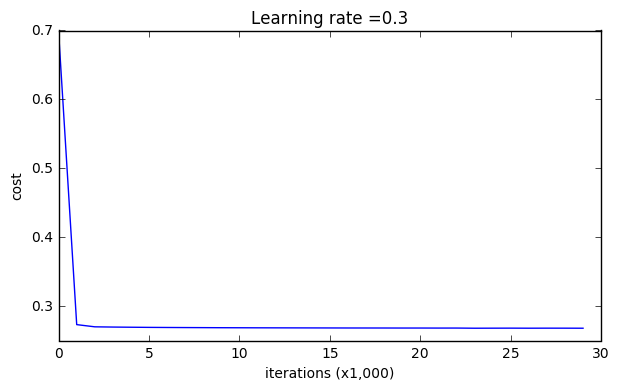

On the train set:
Accuracy: 0.938388625592
On the test set:
Accuracy: 0.93


In [13]:
parameters = model(train_X, train_Y, lambd = 0.7)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

观察结果发现，值得祝贺的是测试集的正确率增加到93%了，可以拯救法国足球对了。没有在训练集上过拟合，下面把决策边界画出来看一下。

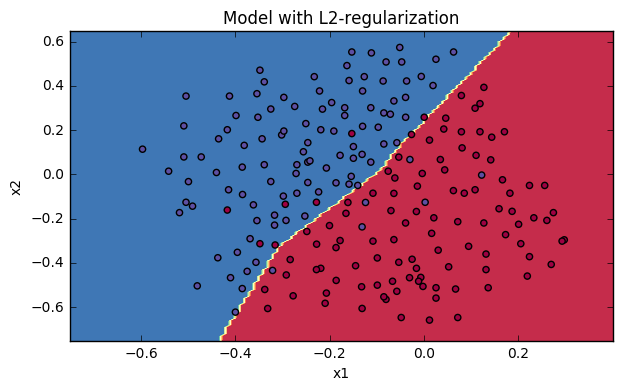

In [14]:
plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

观察：
    1. lambd参数是一个超参数，在训练集上可以进行调试
    2. L2正则化使你的决策边界变得更柔和，如果lambd参数过大，那么也会“过柔和”，导致模型有非常好的偏差。（理解，在代价函数后面添加了正则项，那么对于dW求导，并且更新参数，W = W - α（past cost gradent）-α（正则项导数），可以看出，如果lambd过大，则减去内容更多，W参数更接近于0，可以理解为相当于隐藏单元的影响更少，模型更简单了，所以过拟合的问题就更小了）
    
L2正则化实际上做了什么？
    L2正则化依赖于一个模型有更小的权重比一个拥有大权重的模型简单，因此，通过惩代价函数中的权重的平方和使得把权重修改为更小的值。这将使得代价太大以致于不能拥有大的权重值，这也就导致了更平滑的模型，在这个模型中，当输入变化时，输出变化的较慢。
    
记住：L2正则化的实现主要是在代价函数后面增加了一个正则项，反向传播函数只需要修改关于W参数的梯度值，在后面也额外的增加一个项，最终的结果是权重衰减了，权重变小了。

## dropout
最后，dropout随机失活是一种广泛被应用的技术，特别是对于深度学习，它随机使一些神经元失活，在每次迭代过程中，观看这两个视频，看看随机失活适合什么意思。
（视频在images文件夹里）
视频1：在每次迭代中，你把每一个层的每一个神经元使用1-keep_prob的概率使它变为0或者保持概率keep_prob，也就是0.5，随机失活一半神经元。那些被丢失的神经元就不会在本次迭代的前向或者后向传播中的发挥作用。

视频2:在第一层和第三层上随机失活，使用不同的随时失活值，第一层用0.4，第三层用0.2.


当你把一些神经元消除掉时，你就在修改你的模型了。dropout背后的思想就是在每次得带中，你训练一个不一样的模型，这个模型使用的只有神经元的一部分。有了随机失活，你的神经元将会变得没那么过分依赖于某一个特定的神经元，因为其他神经元可能随时被消除。

### 3.1 dropout前向传播
练习：实现函数，使用一个三层神经网络，并且会在第一层和第二层隐藏层添加dropout，不对输入层和输出层使用dropout技术。

指示：在第一层和第一层上随机失活，需要完成四个步骤：
  1. 创建一个$d^{[1]}$变量与$a^{[1]}$的维度相同，使用np.random.rand() 来随机初始化得到0到1之间的值。这里使用向量化所有样本的实现方式，所以是创建一个随机矩阵$D^{[1]} = [d^{[1](1)} d^{[1](2)} ... d^{[1](m)}] $，和 $A^{[1]}$有一样的维度。
  2. 设置每一个$D^{[l]}$为0使用（1-keep_prob）的概率值，根据适当的阈值。注意，将矩阵x的所有条目设置为0（如果条目小于0.5）或1（如果条目大于0.5），您将执行：x =（x＜0.5）。注意0和1分别等于假真。
  3. 设置$A^{[1]}$ = $A^{[1]} * D^{[1]}$，就除去了失活的神经元，可以把$D^{[l]}$想象成一个面具。
  4. Divide $A^{[1]}$ by `keep_prob`。通过这样做，你保证，成本的结果将仍然具有相同的期望值，没有随机抛弃一部分。（这种技术也称为反向失活技术inverted dropout。）理解：可以理解为原本有n个人一起拉车，每个人只用出1/n的力气，后面按m的比率使n个人随机去掉几个人，那么剩下的人出的力气就要更多，所以除以keep_prob，使剩下的人出力的均值与随机失活前不发生改变。

In [15]:
# GRADED FUNCTION: forward_propagation_with_dropout

def forward_propagation_with_dropout(X, parameters, keep_prob = 0.5):
    """
    Implements the forward propagation: LINEAR -> RELU + DROPOUT -> LINEAR -> RELU + DROPOUT -> LINEAR -> SIGMOID.
    
    Arguments:
    X -- input dataset, of shape (2, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape (20, 2)
                    b1 -- bias vector of shape (20, 1)
                    W2 -- weight matrix of shape (3, 20)
                    b2 -- bias vector of shape (3, 1)
                    W3 -- weight matrix of shape (1, 3)
                    b3 -- bias vector of shape (1, 1)
    keep_prob - probability of keeping a neuron active during drop-out, scalar
    
    Returns:
    A3 -- last activation value, output of the forward propagation, of shape (1,1)
    cache -- tuple, information stored for computing the backward propagation
    """
    
    np.random.seed(1)
    
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    ### START CODE HERE ### (approx. 4 lines)         # Steps 1-4 below correspond to the Steps 1-4 described above. 
    D1 = np.random.rand(A1.shape[0],A1.shape[1])                  # Step 1: initialize matrix D1 = np.random.rand(..., ...)
    D1 = D1<keep_prob                                 # Step 2: convert entries of D1 to 0 or 1 (using keep_prob as the threshold)
    A1 = np.multiply(D1,A1)                           # Step 3: shut down some neurons of A1
    A1 = A1/keep_prob                                 # Step 4: scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    ### START CODE HERE ### (approx. 4 lines)
    D2 = np.random.rand(A2.shape[0],A2.shape[1])                  # Step 1: initialize matrix D2 = np.random.rand(..., ...)
    D2 = D2<keep_prob                                 # Step 2: convert entries of D2 to 0 or 1 (using keep_prob as the threshold)
    A2 = np.multiply(D2,A2)                           # Step 3: shut down some neurons of A2
    A2 = A2/keep_prob                                 # Step 4: scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)
    
    return A3, cache

In [16]:
X_assess, parameters = forward_propagation_with_dropout_test_case()

A3, cache = forward_propagation_with_dropout(X_assess, parameters, keep_prob = 0.7)
print ("A3 = " + str(A3))

A3 = [[ 0.36974721  0.00305176  0.04565099  0.49683389  0.36974721]]


### 3.2 dropout反向传播
练习：同样跟之前一样，实现一个三层神经网络的dropout反向传播过程。在第一层和第二层上使用dropout，并且使用存储在cache里的$D^{[1]}$和 $D^{[2]}$ 。

提示：反向传播实际也很简单，只需要执行两个步骤：
1. 在正向传播过程随机失活了一些神经元，通过应用$D^{[l]}$在$A^{[l]}$上。反向传播，你需要失活同样的神经元，通过把$D^{[l]}$应用在$dA^{[l]}$上。
2. 在正向传播过程中，你使用了A1/keep_prob，那么在反向传播过程，同样也需要使用dA1/keep_prob，

In [17]:
# GRADED FUNCTION: backward_propagation_with_dropout

def backward_propagation_with_dropout(X, Y, cache, keep_prob):
    """
    Implements the backward propagation of our baseline model to which we added dropout.
    
    Arguments:
    X -- input dataset, of shape (2, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation_with_dropout()
    keep_prob - probability of keeping a neuron active during drop-out, scalar
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    
    m = X.shape[1]
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    dA2 = np.dot(W3.T, dZ3)
    ### START CODE HERE ### (≈ 2 lines of code)
    dA2 = dA2*D2              # Step 1: Apply mask D2 to shut down the same neurons as during the forward propagation
    dA2 = dA2/keep_prob       # Step 2: Scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    ### START CODE HERE ### (≈ 2 lines of code)
    dA1 = dA1*D1               # Step 1: Apply mask D1 to shut down the same neurons as during the forward propagation
    dA1 = dA1/keep_prob       # Step 2: Scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

In [18]:
X_assess, Y_assess, cache = backward_propagation_with_dropout_test_case()

gradients = backward_propagation_with_dropout(X_assess, Y_assess, cache, keep_prob = 0.8)

print ("dA1 = " + str(gradients["dA1"]))
print ("dA2 = " + str(gradients["dA2"]))

dA1 = [[ 0.36544439  0.         -0.00188233  0.         -0.17408748]
 [ 0.65515713  0.         -0.00337459  0.         -0.        ]]
dA2 = [[ 0.58180856  0.         -0.00299679  0.         -0.27715731]
 [ 0.          0.53159854 -0.          0.53159854 -0.34089673]
 [ 0.          0.         -0.00292733  0.         -0.        ]]


接下来运行模型使用dropout，keep_prob=0.86  这意味着每次迭代你都要消除第一层和第二层以24%的概率清楚一些神经元。同样的，在model函数中将keep_prob的值修改为小于1的值就启动了dropout技术。

Cost after iteration 0: 0.654391240515
Cost after iteration 1000: 0.175978489298
Cost after iteration 2000: 0.103967074429
Cost after iteration 3000: 0.0766129778736


reg_utils.py:233: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
reg_utils.py:233: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 4000: 0.0671989126981
Cost after iteration 5000: 0.0646690500852
Cost after iteration 6000: 0.062409872597
Cost after iteration 7000: 0.0618787353132
Cost after iteration 8000: 0.0614332181525
Cost after iteration 9000: 0.0611921437576
Cost after iteration 10000: 0.0610169865749
Cost after iteration 11000: 0.0609324508262
Cost after iteration 12000: 0.060826401966
Cost after iteration 13000: 0.0608626412998
Cost after iteration 14000: 0.0608352153702
Cost after iteration 15000: 0.0606645721613
Cost after iteration 16000: 0.0606494723775
Cost after iteration 17000: 0.0606258566212
Cost after iteration 18000: 0.060658745056
Cost after iteration 19000: 0.060596513303
Cost after iteration 20000: 0.0605824357985
Cost after iteration 21000: 0.0605591993809
Cost after iteration 22000: 0.0605789839016
Cost after iteration 23000: 0.0605646146637
Cost after iteration 24000: 0.0605035902699
Cost after iteration 25000: 0.0605017900236
Cost after iteration 26000: 0.060522117412

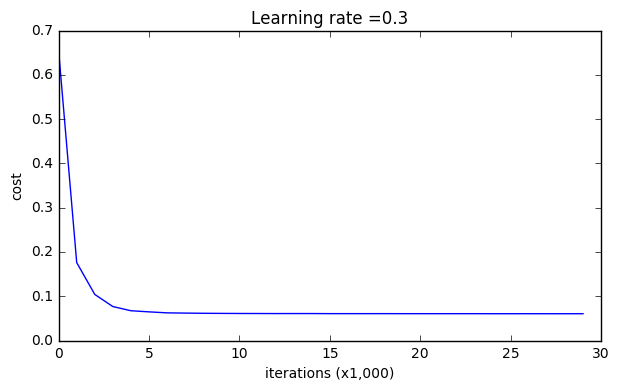

On the train set:
Accuracy: 0.928909952607
On the test set:
Accuracy: 0.95


In [19]:
parameters = model(train_X, train_Y, keep_prob = 0.86, learning_rate = 0.3)

print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

我们可以看出来，dropout技术效果非常好，测试集正确率又提高，到达95%，你的模型没有过拟合训练集，在测试集上也有很好的效果。使用下面代码绘制决策边界。

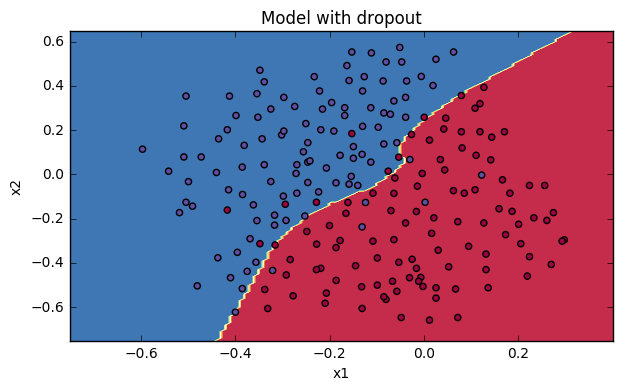

In [20]:
plt.title("Model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

笔记：
1. 在使用dropout时，一个常见的错误是同时在训练集和测试集上使用它，你应该只在训练集上使用dropout技术（随机删除节点）。
2. 深度学习框架tensorflow，PaddlePaddle，keras或咖啡也是使用一个dropout层实现的。

关于dropout你应该记住什么？：
1. dropout是一种正则化技术。
2. 在训练中你只使用dropout。不要在测试期间使用dropout（随机删除节点）。
3. 在向前和向后传播中都要应用dropout。
4. 训练期间，将每一个dropout的keep_prob层保持相同的预期值的激活。例如，如果keep_prob是0.5，那么我们将平均关闭一半的节点，所以输出将按0.5因为只有剩下的一半是有助于解决。除以0.5等于乘以2。因此，输出现在具有相同的期望值。你可以检查它的效果即使keep_prob是其他价值超过0.5。


## 总结
以下是三种对网络是否进行正则化，以及使用哪种正则化技术效果对比：
<table> 
    <tr>
        <td>
        **model**
        </td>
        <td>
        **train accuracy**
        </td>
        <td>
        **test accuracy**
        </td>

    </tr>
        <td>
        3-layer NN without regularization
        </td>
        <td>
        95%
        </td>
        <td>
        91.5%
        </td>
    <tr>
        <td>
        3-layer NN with L2-regularization
        </td>
        <td>
        94%
        </td>
        <td>
        93%
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with dropout
        </td>
        <td>
        93%
        </td>
        <td>
        95%
        </td>
    </tr>
</table> 

注意正则化会损害训练集的性能！这是因为它限制了网络能力的过度拟合训练集。但是，由于它最终提供了更好的测试精度，它正在帮助您的系统。

这一节学到：
1. 正则化将帮助你减少过度拟合。
2. 正则化将使您的权重降低到更低的值。
3. L2正规化和辍学是两种非常有效的正则化技术。